# **Assignment 6 - Weather**
Author: Vanessa Lyra

## Knock airport Weather - Part 1

Get the data from: https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

Plot:
- The temperature
- The mean temperature each day
- The mean temperature for each month

In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# URL data
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"

# Saving CSV data into a dataframe skipiing the first 23 rows of the file with unnecessary data 
df = pd.read_csv(url, skiprows=23, low_memory=False)

# Visualize headers for analysis
headers = df.columns.tolist()
headers

['date',
 'ind',
 'rain',
 'ind.1',
 'temp',
 'ind.2',
 'wetb',
 'dewpt',
 'vappr',
 'rhum',
 'msl',
 'ind.3',
 'wdsp',
 'ind.4',
 'wddir',
 'ww',
 'w',
 'sun',
 'vis',
 'clht',
 'clamt']

##### References 
Skiprows function: https://stackoverflow.com/questions/20637439/skip-rows-during-csv-import-pandas  
Low_memory = False: from error "DtypeWarning: Columns have mixed types. Specify dtype option on import or set low_memory=False"

In [40]:
# Checking file content for reference
df.head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


### Prepping data for analysis

In [41]:
# Converting date column to datetime and defining date format
df["date"] = pd.to_datetime(df["date"], format="%d-%b-%Y %H:%M", errors="coerce")

##### References
Converting datetime: https://pbpython.com/pandas_dtypes.html 

### Temperature Plot

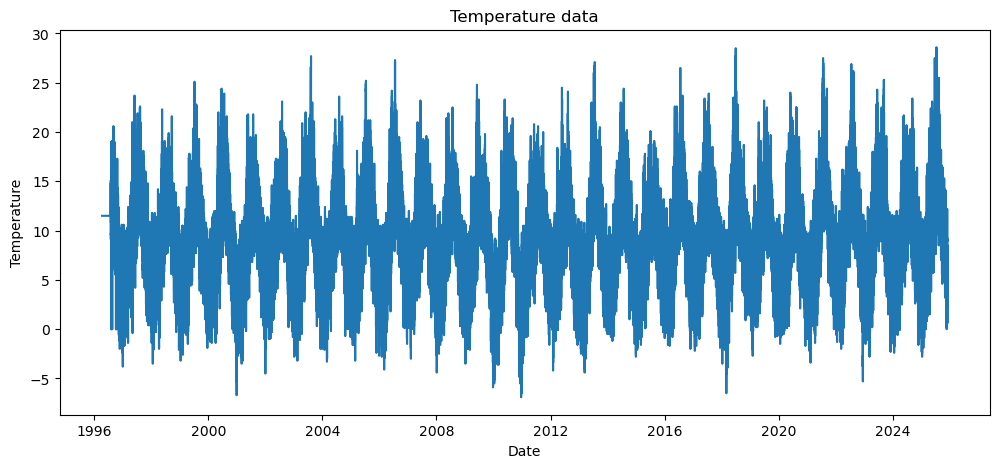

In [42]:
# Plot
plt.figure(figsize=(12,5)) # Plotting a wider graph
sns.lineplot(x="date", y="temp", data=df) # Seaborn line plot

#Title ans axis labels
plt.title("Temperature data") # Title
plt.xlabel("Date") # X-axis label
plt.ylabel("Temperature") # Y-axis label
plt.show()

##### References
Seaborn library: https://seaborn.pydata.org/tutorial/introduction.html 

### Mean temperature each day plot

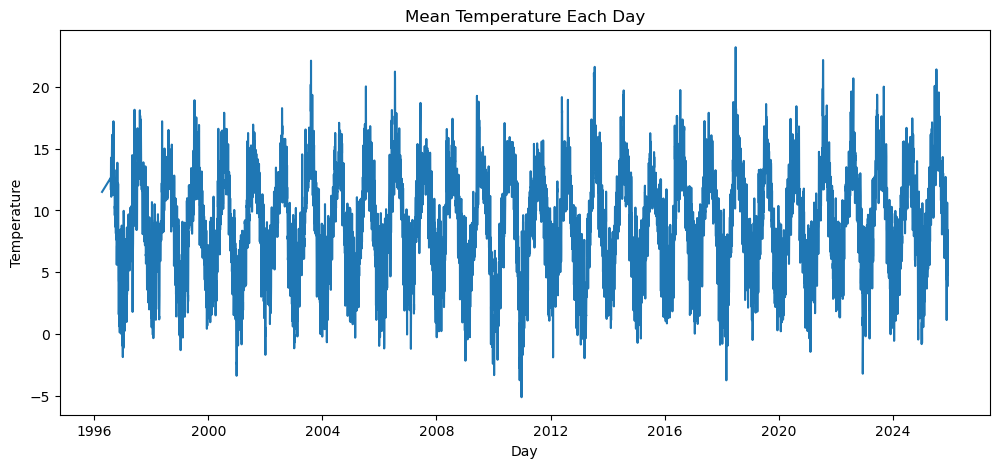

In [ ]:
# Grouping data by day and temperature
# Dt.floor: rounds down DateTime to daily frequency, ignores the time portion of date column
# Reset_index: turns date data back into a regular Dataframe 
mean_daily = df.groupby(df["date"].dt.floor("D"))["temp"].mean().reset_index()

# Plot
plt.figure(figsize=(12,5))
sns.lineplot(x="date", y="temp", data=mean_daily)
plt.title("Mean Temperature Each Day")
plt.xlabel("Per day")
plt.ylabel("Temperature")
plt.show()

##### References
Plotting mean with Seaborn: https://stackoverflow.com/questions/69836554/group-by-and-mean-inside-seaborn-plot  
Round down dates: https://www.geeksforgeeks.org/pandas/pandas-series-dt-floor/  
Fixing TypeError "Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>" with reset.index(): https://github.com/modin-project/modin/issues/847

### Mean temperature each month plot

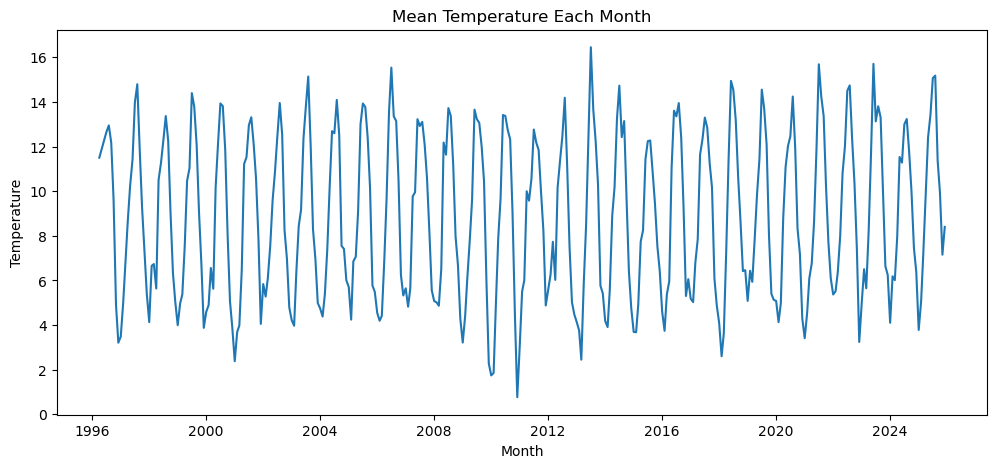

In [ ]:
# Grouping data by date and temperature and calculating mean
# Dt.to_period: converting timestamps to monthly periods
mean_monthly = df.groupby(df["date"].dt.to_period("M"))["temp"].mean()

# Converting mean datatype from period to timestamp
mean_monthly.index = mean_monthly.index.to_timestamp()

# Plot
plt.figure(figsize=(12,5))

# Monthly periods in x-axis and temperatures in y-axis
plt.plot(mean_monthly.index, mean_monthly.values)
plt.title("Mean Temperature Each Month")
plt.xlabel("By month")
plt.ylabel("Temperature")
plt.show()

##### References
Grouping dates by month: https://medium.com/@gfakhira9/to-period-909ee90ce6c1  
Index and values for plot: https://www.kaggle.com/code/ravijoe/seaborn-barplot-and-pandas-value-counts  
Fixing error "float() argument must be a string or a real number, not 'Period'":https://stackoverflow.com/questions/43206554/typeerror-float-argument-must-be-a-string-or-a-number-not-period  

## Part 2:

Plot:
- The Windspeed (there is data missing from this column)  
- The rolling windspeed (say over 24 hours)  
- The max windspeed for each day  
- The monthly mean of the daily max windspeeds 
You do not need to over comment your code. Marks will be given for how nice the plots are.  

### Preparing data

In [45]:
# Ensure windspeed column has only numeric values
df["wdsp"] = pd.to_numeric(df["wdsp"], errors="coerce")

# Substitute missing data (zeros) by NA
df.loc[df["wdsp"] == 0, "wdsp"] = pd.NA

# Sets date column as the DF index instead of a regular column, for easier date manipulation such as slicing, resample
df = df.set_index("date")

##### References:

Replace zeros with NA: https://stackoverflow.com/questions/45416684/python-pandas-replace-multiple-columns-zero-to-nan  
Convert data to numeric values: https://kajodata.com/en/knowledge-base-excel-sql-python/knowledge-base-python-tech-skills/how-pandas-to_numeric-works-in-python-examples-mmk/

### Windspeed plot

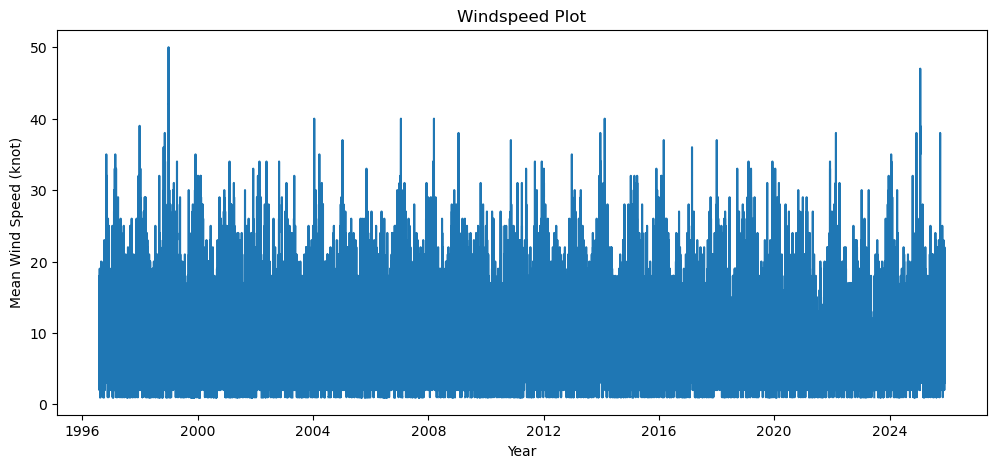

In [ ]:
# Plotting
plt.figure(figsize=(12, 5))

# x-axis-> df.index fetch dates from dataframe, 
# y-axis -> df["wdsp"] wind speed from each date
plt.plot(df.index, df["wdsp"]) 
plt.title("Windspeed")
plt.xlabel("Date")
plt.ylabel("Mean windspeed")
plt.show()

##### References: 

Dataframe plotting X-axis: https://www.geeksforgeeks.org/data-analysis/how-to-set-dataframe-column-value-as-x-axis-labels-in-python-pandas/

### The rolling windspeed 24 hours plot

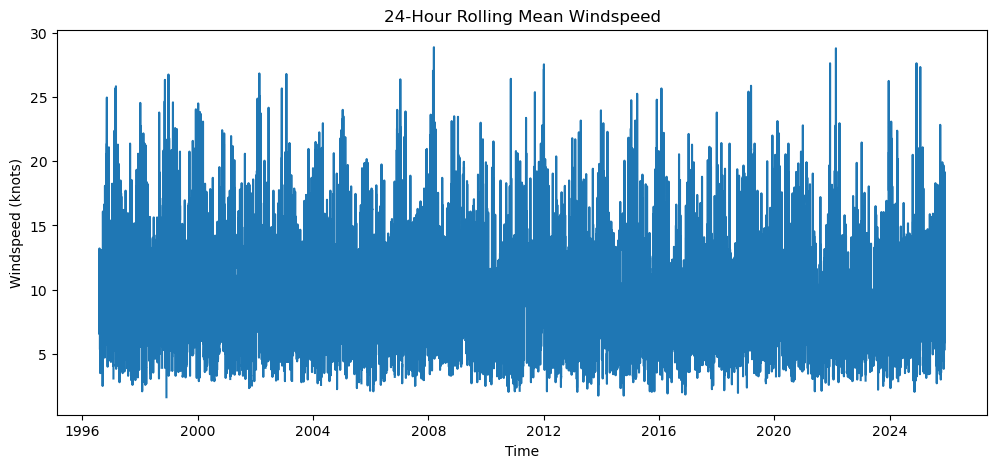

In [ ]:
# Calculating 24h rolling mean
wdsp_24h = df["wdsp"].rolling(24).mean()

# Plotting 
plt.figure(figsize=(12, 5))
plt.plot(wdsp_24h.index, wdsp_24h)
plt.title("24 hours rolling mean windspeed")
plt.xlabel("Date")
plt.ylabel("Windspeed in knots")
plt.show()

#### References

Rolling mean calculation: https://www.statology.org/rolling-mean-pandas/  

### Max windspeed for each day plot

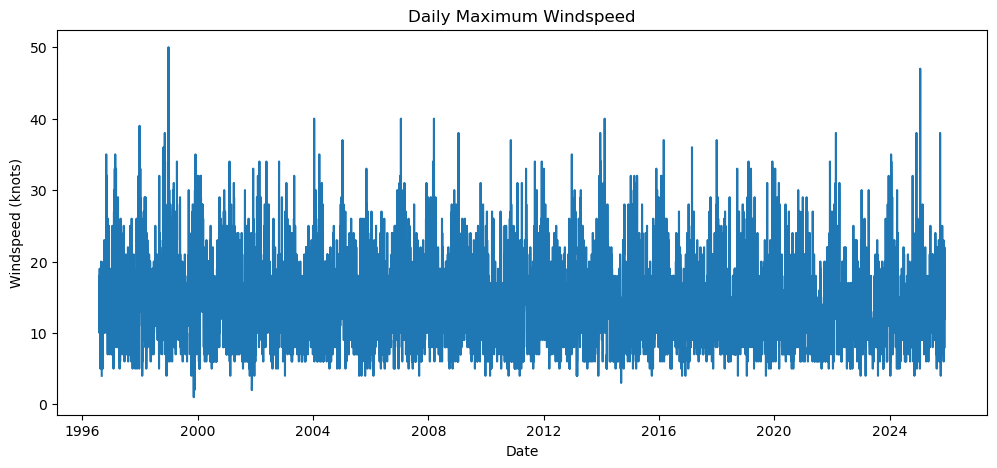

In [ ]:
# Grouping date by date using resample, max() finds max windspeed for each day
daily_max = df["wdsp"].resample("D").max()

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(daily_max.index, daily_max)
plt.title("Maximum windspeed per day")
plt.xlabel("Per day")
plt.ylabel("Windspeed in knots")
plt.show()

### The monthly mean of the daily max windspeeds

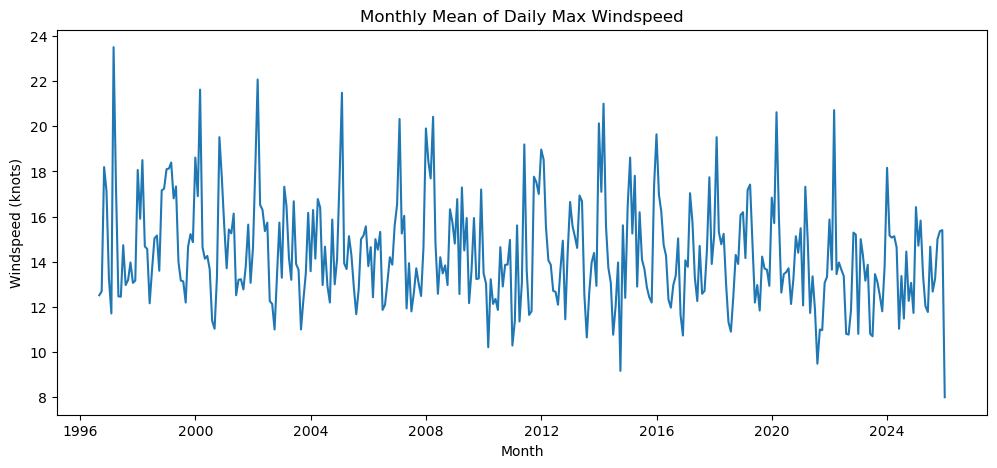

In [ ]:
# Groups daily max by month using resample and calculate mean
monthly_mean = daily_max.resample("ME").mean()

plt.figure(figsize=(12, 5))
plt.plot(monthly_mean.index, monthly_mean)
plt.title("Monthly mean of daily max windspeed")
plt.xlabel("By month")
plt.ylabel("Windspeed (knots)")
plt.show()

Resample values: https://www.geeksforgeeks.org/python/python-pandas-dataframe-resample/  
Resample rule options: https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78/  
Max() function: https://medium.com/@whyamit404/understanding-pandas-max-a6c077525d42  
Resample ME: from error "FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead."

** End **